In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import datetime

# Basic line chart with data

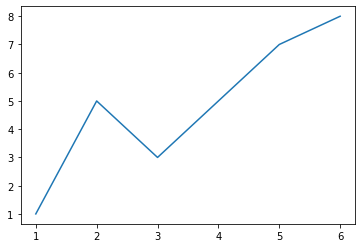

In [7]:
x = [1, 2, 3, 4, 5, 6]
y = [1, 5, 3, 5, 7, 8]

plt.plot(x, y)
plt.show()

Alternatively, we could've completely omitted the x axis, and just plotted y. This would result in the X-axis being filled with range(len(y)):

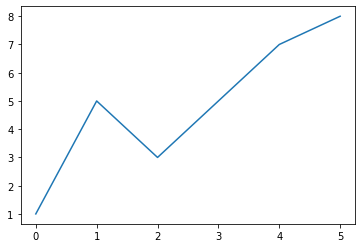

In [4]:
y = [1, 5, 3, 5, 7, 8]

plt.plot(y)
plt.show()

# Plot a Line Plot Logarithmically

When dealing with datasets that have progressively larger numbers, and especially if their distribution leans towards being exponential, it's common to plot a line plot on a logarithmic scale.

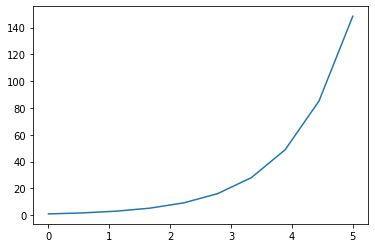

In [8]:
x = np.linspace(0, 5, 10) # [0, 0.55, 1.11, 1.66, 2.22, 2.77, 3.33, 3.88, 4.44, 5]
y = np.exp(x)  # [1, 1.74, 3.03, 5.29, 9.22, 16.08, 28.03, 48.85, 85.15, 148.41]

plt.plot(x, y)
plt.show()

# Parameters

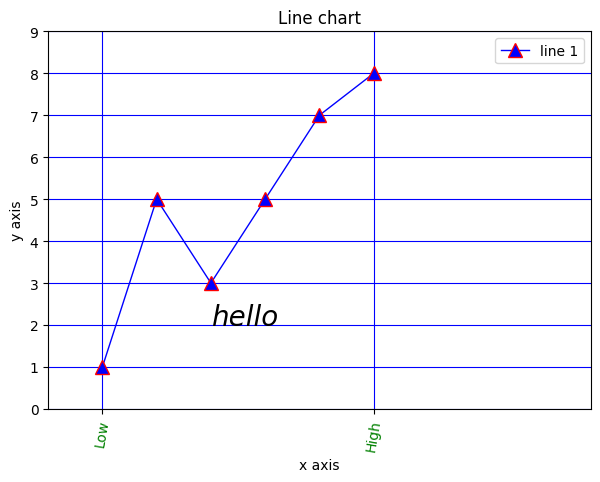

In [18]:
x = [1, 2, 3, 4, 5, 6]
y = [1, 5, 3, 5, 7, 8]
figure(figsize=(7, 5), dpi=100) # config figure size
plt.plot(x, y, label = "line 1", linestyle="-", linewidth=1, color="blue", 
         marker="^", markeredgecolor="red", markersize=10)
plt.axis(xmin=0, xmax=10, ymin=0, ymax=9) # set range for each axis
plt.xlabel('x axis') # set label for x axis
plt.xticks(ticks = [1, 6], labels = ['Low', 'High'],
          color="green", rotation=80) # Get or set the current tick locations and labels of the x-axis.
plt.ylabel('y axis') # set label for y axis
plt.title("Line chart") # set title for chart
plt.text(x=3, y=2, s='hello', fontstyle='italic', fontsize=20) # add text to the Axes
plt.grid(b=True, color='blue', axis='both') # show grid
plt.legend() # show legend
plt.show()

# Working with dataset

In [19]:
df = pd.read_csv("data/sale_10m.csv", usecols = ["time", "amt_novat", "vat", "quant"], parse_dates=["time"])
df["time_1"] = df["time"].dt.strftime('%Y-%m-%d')

In [20]:
df

,time,amt_novat,vat,quant,time_1
0,2020-12-31 07:11:00+00:00,-42.4,-2.12,-8.81,2020-12-31
1,2020-12-31 11:17:00+00:00,-30.8,0.00,-1.70,2020-12-31
2,2020-12-31 11:17:00+00:00,-67.9,0.00,-17.00,2020-12-31
3,2020-12-31 11:37:00+00:00,-22.3,-2.23,-17.00,2020-12-31
4,2020-12-31 11:37:00+00:00,-47.2,-4.72,-34.00,2020-12-31
...,...,...,...,...,...
59994,2021-01-05 01:32:00+00:00,21.9,2.19,17.00,2021-01-05
59995,2021-01-05 01:32:00+00:00,40.4,4.04,17.00,2021-01-05
59996,2021-01-05 11:38:00+00:00,3.6,0.36,1.70,2021-01-05
59997,2021-01-05 11:38:00+00:00,3.4,0.34,1.70,2021-01-05


In [21]:
grouby_result = df.groupby(['time_1'])['amt_novat', "vat", "quant"].agg('sum')

/Users/nguyenhuy/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [22]:
grouby_result["time"] = grouby_result.index
grouby_result

,amt_novat,vat,quant,time
time_1,,,,
2020-12-29,18.7,0.94,6.24,2020-12-29
2020-12-30,214733.3,13016.82,67270.67,2020-12-30
2020-12-31,669073.4,52215.63,159408.00,2020-12-31
2021-01-01,371364.0,24618.77,99102.98,2021-01-01
2021-01-02,316410.2,24000.30,80316.21,2021-01-02
2021-01-04,102348.1,5430.00,39372.81,2021-01-04
2021-01-05,184900.1,14419.89,55129.69,2021-01-05


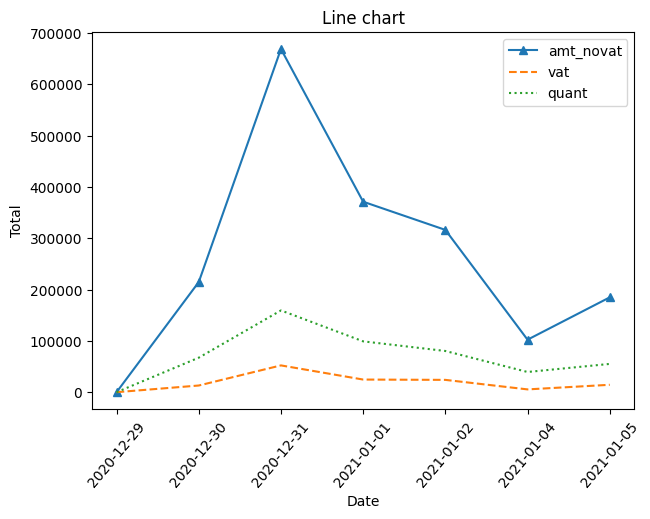

In [24]:
figure(figsize=(7, 5), dpi=100)
plt.plot(grouby_result["time"], grouby_result["amt_novat"], label = "amt_novat", linestyle="-", marker="^")
plt.plot(grouby_result["time"], grouby_result["vat"], label = "vat", linestyle="--")
plt.plot(grouby_result["time"], grouby_result["quant"], label = "quant", linestyle=":")
plt.legend()
plt.xlabel('Date')
plt.xticks(rotation=50)
plt.ylabel('Total')
plt.title("Line chart")
# plt.savefig("chart.png")
plt.show()

Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot